### Importing Libraries

In [1]:
#import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import re

#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Load bank_reviews dataset 

In [2]:
df = pd.read_csv('bank_reviews.csv')
df.head()

,review,rating,date,bank,source
0,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play
1,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play
2,good,4,2025-06-05,CBE,Google Play
3,not functional,1,2025-06-05,CBE,Google Play
4,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6670 entries, 0 to 6669
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  6669 non-null   object
 1   rating  6670 non-null   int64 
 2   date    6670 non-null   object
 3   bank    6670 non-null   object
 4   source  6670 non-null   object
dtypes: int64(1), object(4)
memory usage: 260.7+ KB


In [4]:
df['review']

0            the app is proactive and a good connections.
1         I cannot send to cbebirr app. through this app.
2                                                    good
3                                          not functional
4       everytime you uninstall the app you have to re...
                              ...                        
6665                                            Nice one.
6666                           በጣም ደስ የሚል ለውጥ አናመሰግናለን 🇪🇹
6667         Best application👍Thank you ! Abyssinia bank.
6668    Absolutely it's fantastic apps this New apps i...
6669           The best app next to Tele birr in ethiopia
Name: review, Length: 6670, dtype: object

### Preprocessing the Data¶
Steps:

1. Clean text: Remove punctuation, special characters, convert to lowercase.
2. Tokenize: Split text into words.
3. Remove stop words: Eliminate common words (e.g., "the," "and").
4. Lemmatize: Reduce words to base form (e.g., "running" → "run").




* As shown the reveiw column in our data contains Amharic sentences so I have to translate it first to English
### Use Google Translate API
### Step 1: Install googletrans
### pip install googletrans==4.0.0-rc1


### Step 2: Translate Function
### Step 3: Apply Translation to Amharic Reviews

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\smith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
import pandas as pd
from translate import Translator
from langdetect import detect
import re

# Clean string: remove extra spaces and symbols
def clean_text(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'[^\w\s]', '', text).strip()

# Language detection with fallback
def detect_lang(text):
    try:
        clean = clean_text(text)
        if not clean or len(clean) < 3:  # skip very short texts
            return 'unknown'
        return detect(clean)
    except Exception as e:
        print(f"Language detection failed: {e}")
        return 'unknown'

# Translate using 'translate' library
def translate_to_english(text):
    try:
        if not isinstance(text, str) or not text.strip():
            return text
        translator = Translator(to_lang="en")
        return translator.translate(text)
    except Exception as e:
        print(f"Translation failed: {e}")
        return text

# --- Load your real dataframe here ---
# Make sure 'review' column exists
# Example only (remove this if your own df is loaded)
# df = pd.DataFrame({'review': [...]})

# Clean and filter empty rows
df = df[df['review'].notna()]
df['review'] = df['review'].astype(str).apply(lambda x: x.strip())
df = df[df['review'] != '']  # Remove empty strings

# Detect language
df['lang'] = df['review'].apply(detect_lang)

# Translate if not English
df['translated_review'] = df.apply(
    lambda row: translate_to_english(row['review']) if row['lang'] != 'en' else row['review'],
    axis=1
)

# View result
print(df[['review', 'lang', 'translated_review']].head())


Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features in text.
Language detection failed: No features i

In [7]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # or np.nan if you want to preserve NaNs
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)


# Apply preprocessing
df['processed_review'] = df['translated_review'].apply(preprocess_text)


In [8]:
df

,review,rating,date,bank,source,lang,translated_review,processed_review
0,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,en,the app is proactive and a good connections.,app proactive good connection
1,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,en,I cannot send to cbebirr app. through this app.,send cbebirr app app
2,good,4,2025-06-05,CBE,Google Play,so,good,good
3,not functional,1,2025-06-05,CBE,Google Play,en,not functional,functional
4,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play,en,everytime you uninstall the app you have to re...,everytime uninstall app reach physically oldy ...
...,...,...,...,...,...,...,...,...
6665,Nice one.,5,2024-01-14,BOA,Google Play,en,Nice one.,nice one
6666,በጣም ደስ የሚል ለውጥ አናመሰግናለን 🇪🇹,5,2024-01-14,BOA,Google Play,unknown,በጣም ደስ የሚል ለውጥ አናመሰግናለን 🇪🇹,በጣም ደስ የሚል ለውጥ አናመሰግናለን
6667,Best application👍Thank you ! Abyssinia bank.,5,2024-01-12,BOA,Google Play,en,Best application👍Thank you ! Abyssinia bank.,best abyssinia bank
6668,Absolutely it's fantastic apps this New apps i...,5,2024-01-11,BOA,Google Play,en,Absolutely it's fantastic apps this New apps i...,absolutely fantastic apps new apps fast good apps


### Sentiment Analysis (VADER)

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review'].apply(get_vader_sentiment)

# Display sentiment distribution
print(df['vader_sentiment'].value_counts())


vader_sentiment
positive    3486
neutral     2201
negative     982
Name: count, dtype: int64


### Sentiment Analysis with TextBlob¶
#### Description: TextBlob provides a straightforward way to classify sentiments based on polarity scores.

In [20]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['processed_review'].apply(get_sentiment)

# Display sentiment distribution
print(df['sentiment'].value_counts())

sentiment
positive    3533
neutral     2437
negative     699
Name: count, dtype: int64


### Advanced Sentiment Analysis with Machine Learning

Description: Machine learning models like Naive Bayes improve accuracy by training on labeled data.

**Steps**:
* Use star ratings as labels (e.g., 4-5 stars = positive, 1-2 stars = negative).
* Extract features using TF-IDF.
* Train and evaluate a classifier.

In [27]:
# Create labels based on ratings
df['label'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7698650674662668


### Aggregate Sentiment by Bank and Rating

In [28]:
sentiment_summary = df.groupby(['bank', 'rating'])['sentiment_score'].mean().reset_index()

In [29]:
sentiment_summary

,bank,rating,sentiment_score
0,BOA,1,-0.175629
1,BOA,2,-0.053766
2,BOA,3,0.115394
3,BOA,4,0.245347
4,BOA,5,0.323730
5,CBE,1,-0.092763
6,CBE,2,-0.011260
7,CBE,3,0.158479
8,CBE,4,0.317414
9,CBE,5,0.364923


### Keyword Extraction (TF-IDF)

##### Description: TF-IDF identifies words that are important in specific reviews relative to the entire dataset.

In [33]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['access' 'account' 'add' 'also' 'always' 'amazing' 'app' 'application'
 'apps' 'bad' 'balance' 'bank' 'banking' 'best' 'better' 'birr' 'branch'
 'ca' 'cbe' 'code' 'could' 'customer' 'dashen' 'day' 'developer' 'easy'
 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'experience' 'fast'
 'feature' 'fix' 'friendly' 'get' 'go' 'good' 'great' 'help' 'history'
 'issue' 'keep' 'life' 'like' 'love' 'make' 'mobile' 'money' 'much' 'need'
 'network' 'new' 'nice' 'one' 'open' 'option' 'payment' 'phone' 'please'
 'previous' 'problem' 'properly' 'really' 'recent' 'say' 'security' 'see'
 'send' 'service' 'show' 'simple' 'sometimes' 'super' 'system' 'thank'
 'thanks' 'thing' 'time' 'transaction' 'transfer' 'try' 'update' 'updated'
 'use' 'used' 'user' 'using' 'verification' 'version' 'well' 'work'
 'working' 'worst' 'would' 'wow' 'በጣም' 'ነው']


### Generate keywords per bank (CBE, BOA, Dashen)

In [39]:
# Create a dictionary to store keywords per bank
bank_keywords = {}

# Loop through each unique bank
for bank in df['bank'].unique():
    # Filter reviews for the current bank
    bank_reviews = df[df['bank'] == bank]['processed_review']
    
    # Initialize and fit TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(bank_reviews)
    
    # Extract top keywords
    keywords = vectorizer.get_feature_names_out()
    
    # Store in dictionary
    bank_keywords[bank] = keywords

# Print top keywords for each bank
for bank, keywords in bank_keywords.items():
    print(f"Top keywords for {bank}:")
    print(", ".join(keywords))
    print()


Top keywords for CBE:
access, account, add, also, always, amazing, app, application, apps, available, bad, balance, bank, banking, best, better, birr, branch, ca, cbe, code, could, customer, day, developer, download, easy, error, ethiopia, even, ever, every, excellent, fast, feature, fix, friendly, get, go, good, great, help, history, issue, keep, last, life, like, love, make, mobile, money, much, need, network, new, nice, number, one, option, payment, phone, please, previous, problem, properly, really, recent, say, see, send, service, show, simple, sometimes, statement, system, thank, thanks, thing, time, transaction, transfer, try, update, updated, use, used, user, using, verification, version, well, work, working, would, wow, year, በጣም, ነው

Top keywords for Dashen:
able, account, ahead, also, always, amazing, amole, app, application, bank, banking, best, better, bill, budget, changer, chat, convenience, convenient, customer, dashen, design, digital, easier, easily, easy, effortless,

### Combining Sentiment Analysis and Keyword Extraction

Description: Analyze keywords in positive vs. negative reviews to understand user preferences and issues.

In [40]:
# Filter positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['app' 'application' 'bank' 'best' 'easy' 'fast' 'good' 'nice'
 'transaction' 'use']
Top Keywords in Negative Reviews: ['account' 'app' 'bad' 'bank' 'money' 'time' 'transaction' 'update' 'work'
 'worst']


### Save Output CSV

In [42]:
df.to_csv('bank_reviews_with_sentiment_themes.csv', index=False)

### Visualizing the Results

**Visualizations**:
* Bar Chart: Show the distribution of positive, negative, and neutral sentiments.
* Word Cloud: Visualize frequent keywords in positive and negative reviews.

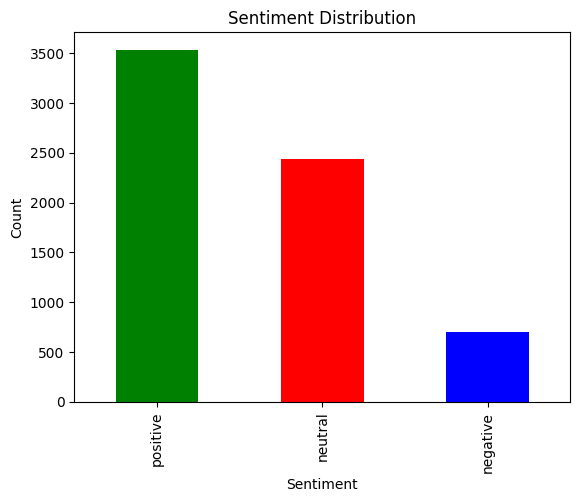

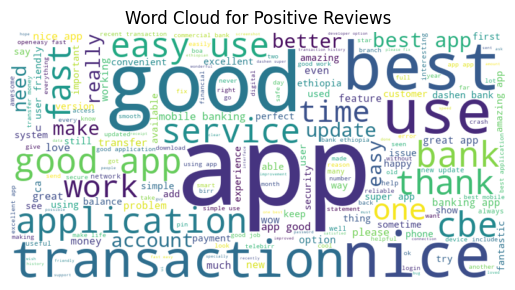

In [43]:
# Sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

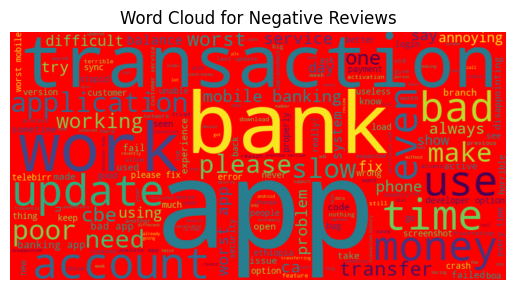

In [44]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()